<a href="https://colab.research.google.com/github/notomasz/MZ/blob/master/JMR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 
import re
import nltk 
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive',  force_remount=True)
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from bs4 import BeautifulSoup
import requests
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences   
from nltk.corpus import stopwords
nltk.download('stopwords')
from sklearn.model_selection import train_test_split
from sklearn.metrics import (make_scorer, recall_score, f1_score, accuracy_score, precision_score, confusion_matrix)
!pip install bs4
!pip install requests

Mounted at /content/drive
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
train = pd.read_csv('/content/drive/My Drive/python-data-engineer-crawler-tomasz-poniatowski/train.csv')
test = pd.read_csv('/content/drive/My Drive/python-data-engineer-crawler-tomasz-poniatowski/test.csv')
keywords = pd.read_csv('/content/drive/My Drive/python-data-engineer-crawler-tomasz-poniatowski/keyword2tumor_type.csv')

In [3]:
train.head()

,url,doc_id,label
0,http://elbe-elster-klinikum.de/fachbereiche/ch...,1,1
1,http://klinikum-bayreuth.de/einrichtungen/zent...,3,3
2,http://klinikum-braunschweig.de/info.php/?id_o...,4,1
3,http://klinikum-braunschweig.de/info.php/?id_o...,5,1
4,http://klinikum-braunschweig.de/zuweiser/tumor...,6,3


In [4]:
test.head()

,url,doc_id
0,http://chirurgie-goettingen.de/medizinische-ve...,0
1,http://evkb.de/kliniken-zentren/chirurgie/allg...,2
2,http://krebszentrum.kreiskliniken-reutlingen.d...,7
3,http://marienhospital-buer.de/mhb-av-chirurgie...,15
4,http://marienhospital-buer.de/mhb-av-chirurgie...,16


In [5]:
keywords.head()

,keyword,tumor_type
0,senologische,Brust
1,brustzentrum,Brust
2,breast,Brust
3,thorax,Brust
4,thorakale,Brust


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


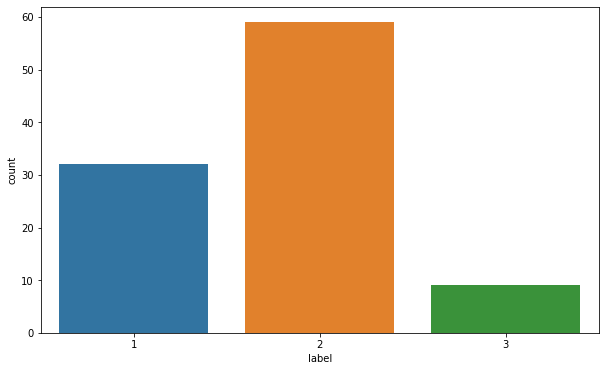

In [6]:
plt.figure(figsize=(10,6))
sns.countplot(train['label'])

In [7]:
#for  e in train['url']:
 # page = requests.get(e)

In [8]:
df = pd.DataFrame(columns=['text'])
for i, e in enumerate(train['url']):
    try:
      response = requests.get(e, verify=False).text
    except:
      pass
    soup1 = BeautifulSoup(response, 'html.parser')
    soup2 = soup1.getText()
    df.loc[i] = soup2

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is be

In [9]:
df['text']

0     \n\n\n\n\n\n\n\nElbe-Elster Klinikum - Chirurg...
1     \n\n\n\n\n\nOnkologisches Zentrum | Klinikum B...
2     \n\n\nZentrum - Sozialpädiatrisches Zentrum - ...
3     \n\n\nLeistung - Spezielle Unterstützung bei d...
4     \n\n\nZuweiser - Tumorkonferenzen - Tumorkonfe...
                            ...                        
95    \n\n\n\n\n\n\n\n\n\n\n\nuniFM | uniCROSS\n\n\n...
96    \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nInte...
97    \n\n\n\n\n\n\n\n\n\n\n\n\nFür Ärzte | Vivantes...
98    \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nInnere Medizin –...
99    \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...
Name: text, Length: 100, dtype: object

In [10]:
def cleaning(text):
    pat1 = r'@[A-Za-z0-9]+'
    pat2 = r'https?://[A-Za-z0-9./]+'
    combined_pat = r'|'.join((pat1,pat2))
    text = re.sub(combined_pat,'',str(text))
    text = re.sub("[^a-zA-Z]", " ", str(text))
    final_remove_space = re.sub(' +',' ',str(text))
    return final_remove_space

In [11]:
df2 = pd.DataFrame(columns=['text'])
for i,e in enumerate(df['text']):
  df2.loc[i] = cleaning(e)

In [12]:
manuals = set(['www', 'projekt', 'party', 'kontakt', 'length ', 'else', 'offset', 'n', 'x', 'decryptCharcode ', 'document ', 'return ', 'translations ',
'window ', 'var ', 'userAgent', 'coalesce', 'multiple', 'content', 'accordions', 'into', 'one', 'function', 'getElementById', 'querySelector',
 'if', 'cookie ', 'previousElementSibling','el', 'proxy ', 'request', 'cookieconsent', 'dismiss', 'removeCookieLayer', 'JavaScript',
 'insertBefore', 'window ','script', 'dataLayer', 'push', 'arguments', 'function', 'config', 'documentElement', 'classname', 'replace', 'js',
 'Google', 'Analytics', 'true', 'function', 'path', 'ip', 'Youtube', 'Facebook'])

manuals = [e.lower() for e in manuals]

In [13]:
tok = []
for e in df2['text']:
  tok.append(nltk.tokenize.word_tokenize(e))
df2['tokens'] = tok

In [14]:
stop_words = set(stopwords.words('german')) 
stop_words_eng = set(stopwords.words('english')) 

In [15]:
filtered_list = []
for e in range(len(df2)):
  filtered_sentence = [w for w in df2['tokens'].loc[e] if not w in stop_words or stop_words_eng]
  filtered_sentence = [w for w in df2['tokens'].loc[e] if not w.lower() in manuals]
  print(filtered_sentence)
  filtered_list.append(filtered_sentence)
df2['filtered'] = filtered_list

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [16]:
for e in range(len(df2)):
  df2['filtered'].loc[e] = np.char.replace(np.char.lower(df2['filtered'][e]), "'", "")

In [17]:
df2['filtered']

0     [elbe, elster, klinikum, chirurgie, finsterwal...
1     [onkologisches, zentrum, klinikum, bayreuth, z...
2     [zentrum, sozialp, diatrisches, zentrum, st, d...
3     [leistung, spezielle, unterst, tzung, bei, der...
4     [zuweiser, tumorkonferenzen, tumorkonferenz, g...
                            ...                        
95    [unifm, unicross, organization, freiburg, de, ...
96    [interdisziplin, re, neurovaskul, re, konferen...
97    [f, r, rzte, vivantes, w, d, s, l, i, w, l, w,...
98    [innere, medizin, h, matologie, onkologie, und...
99    [startseite, klinikum, hochsauerland, klinikum...
Name: filtered, Length: 100, dtype: object

In [18]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

In [19]:
stem_list = []

for e in range(100):
  stem = []
  for i in df2['filtered'].loc[e]:
    stem.append(stemmer.stem(i))
  stem_list.append(stem)

df2['stem'] = stem_list

In [20]:
df2['y'] = train['label']

In [21]:
df2.head()

,text,tokens,filtered,stem,y
0,Elbe Elster Klinikum Chirurgie Finsterwalde d...,"[Elbe, Elster, Klinikum, Chirurgie, Finsterwal...","[elbe, elster, klinikum, chirurgie, finsterwal...","[elb, elster, klinikum, chirurgi, finsterwald,...",1
1,Onkologisches Zentrum Klinikum Bayreuth Zum I...,"[Onkologisches, Zentrum, Klinikum, Bayreuth, Z...","[onkologisches, zentrum, klinikum, bayreuth, z...","[onkologisch, zentrum, klinikum, bayreuth, zum...",3
2,Zentrum Sozialp diatrisches Zentrum St dtisch...,"[Zentrum, Sozialp, diatrisches, Zentrum, St, d...","[zentrum, sozialp, diatrisches, zentrum, st, d...","[zentrum, sozialp, diatrisch, zentrum, st, dti...",1
3,Leistung Spezielle Unterst tzung bei der Anme...,"[Leistung, Spezielle, Unterst, tzung, bei, der...","[leistung, spezielle, unterst, tzung, bei, der...","[leistung, speziel, unterst, tzung, bei, der, ...",1
4,Zuweiser Tumorkonferenzen Tumorkonferenz Gast...,"[Zuweiser, Tumorkonferenzen, Tumorkonferenz, G...","[zuweiser, tumorkonferenzen, tumorkonferenz, g...","[zuweis, tumorkonferenzen, tumorkonferenz, gas...",3


In [22]:
labels = df2['y'].tolist()

In [23]:
sentences = []
for i in range(100):
  one_obs = ' '.join([e for e in df2['stem'].loc[i]])
  sentences.append(one_obs)
labels = df2['y'].tolist()

In [24]:
len(df2['stem'].loc[0])

1541

In [25]:
df2['stem'].loc[0]

['elb',
 'elster',
 'klinikum',
 'chirurgi',
 'finsterwald',
 'div',
 'jsn',
 'modulecontain',
 'ul',
 'menu',
 'mainmenu',
 'ul',
 'li',
 'div',
 'jsn',
 'modulecontain',
 'ul',
 'menu',
 'mainmenu',
 'ul',
 'width',
 'px',
 'div',
 'jsn',
 'modulecontain',
 'ul',
 'menu',
 'mainmenu',
 'ul',
 'ul',
 'margin',
 'left',
 'px',
 'margin',
 'left',
 'px',
 'div',
 'jsn',
 'modulecontain',
 'ul',
 'menu',
 'mainmenu',
 'li',
 'jsn',
 'submenu',
 'flipback',
 'ul',
 'ul',
 'right',
 'px',
 'right',
 'px',
 'jsn',
 'po',
 'toolbar',
 'div',
 'jsn',
 'modulecontain',
 'ul',
 'menu',
 'mainmenu',
 'ul',
 'ul',
 'margin',
 'right',
 'px',
 'margin',
 'right',
 'px',
 'margin',
 'left',
 'auto',
 'div',
 'jsn',
 'modulecontain',
 'ul',
 'menu',
 'sidemenu',
 'ul',
 'div',
 'jsn',
 'modulecontain',
 'ul',
 'menu',
 'sidemenu',
 'ul',
 'li',
 'width',
 'px',
 'div',
 'jsn',
 'modulecontain',
 'ul',
 'menu',
 'sidemenu',
 'li',
 'ul',
 'right',
 'px',
 'bodi',
 'jsn',
 'direct',
 'rtl',
 'div',
 '

In [26]:
sentences[0]

'elb elster klinikum chirurgi finsterwald div jsn modulecontain ul menu mainmenu ul li div jsn modulecontain ul menu mainmenu ul width px div jsn modulecontain ul menu mainmenu ul ul margin left px margin left px div jsn modulecontain ul menu mainmenu li jsn submenu flipback ul ul right px right px jsn po toolbar div jsn modulecontain ul menu mainmenu ul ul margin right px margin right px margin left auto div jsn modulecontain ul menu sidemenu ul div jsn modulecontain ul menu sidemenu ul li width px div jsn modulecontain ul menu sidemenu li ul right px bodi jsn direct rtl div jsn modulecontain ul menu sidemenu li ul left px right auto div jsn modulecontain ul menu sidemenu ul ul margin left px csrf token e c d ee ee bbe edb system path root base jqueri dropdown toggl dropdown jqueri window on load new jcaption img caption jsntemplat inittempl templateprefix jsn reta pro templatepath templat jsn reta pro enablertl enablegotoplink enablemobil enablemobilemenusticki enabledesktopmenustick

In [27]:
training_sentences, testing_senteces, training_labels, testing_labels = train_test_split(sentences, labels, train_size=0.8, random_state=1)

training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [28]:
vocab_size = 500
embedding_dim = 16
max_length = 280
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

In [29]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_senteces)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
training_padded = sc.fit_transform(training_padded)
testing_padded = sc.fit_transform(testing_padded)

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

#number of neighbours
k_range = range(1,50,1)
param_grid = dict(n_neighbors = k_range) #key = parameter name, values = values for parameters that will be tested

#instantianate of KNN
knn1= KNeighborsClassifier('distance')

grid1 = GridSearchCV(knn1, param_grid, cv=5, scoring='f1_weighted', n_jobs=-1, return_train_score=True, refit=True)

#gridSearch
knn_scores1 = grid1.fit(training_padded, training_labels_final)



x1 mean test f1:  0.5962639382676148


Text(0.5, 1.0, 'KNN')

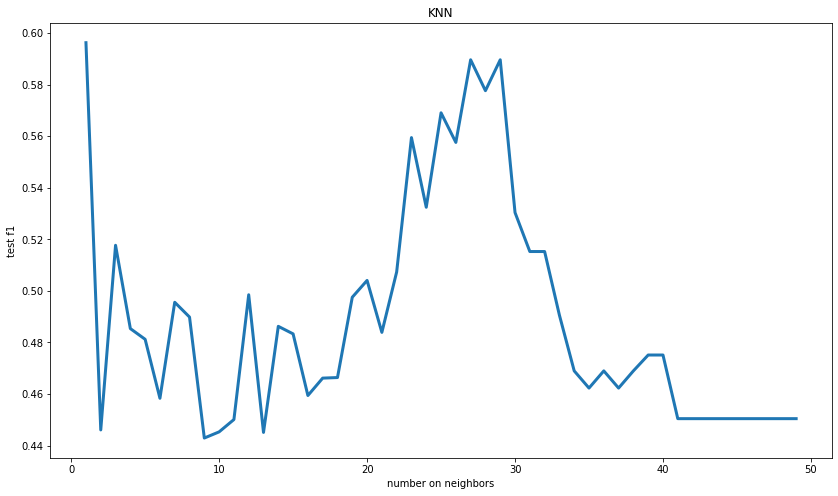

In [32]:
print("x1 mean test f1: ", knn_scores1.best_score_)
n_neight = [e for e in knn_scores1.cv_results_['param_n_neighbors']]
test_score = [e for e in knn_scores1.cv_results_['mean_test_score']]
plt.figure(figsize=(14,8))
plt.plot(n_neight, test_score, linewidth=3)
plt.xlabel('number on neighbors')
plt.ylabel('test f1')
plt.title('KNN')

In [33]:
scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score, average = 'weighted'),
           'recall': make_scorer(recall_score, average = 'weighted'),
           'f1_weighted': make_scorer(f1_score, average = 'weighted')
           }

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = dict(penalty = ['l2'],C = np.logspace(-6, 6, 30),)
    
#instantianate of Logit
logit = LogisticRegression()
logit_tuning = GridSearchCV(logit, param_grid, cv=5, scoring='f1_weighted', n_jobs=-1, return_train_score=True, refit=True)

#gridSearch
logit_scores = logit_tuning.fit(training_padded, training_labels_final)

In [35]:
for e, i in zip(logit_scores.cv_results_['mean_train_score'], logit_scores.cv_results_['mean_test_score']):
  print('train f1: {}\ttest f1: {}'.format(e,i)) 

train f1: 0.45002855511136486	test f1: 0.4504615384615384
train f1: 0.45002855511136486	test f1: 0.4504615384615384
train f1: 0.45002855511136486	test f1: 0.4504615384615384
train f1: 0.45002855511136486	test f1: 0.4504615384615384
train f1: 0.45002855511136486	test f1: 0.4504615384615384
train f1: 0.45002855511136486	test f1: 0.4504615384615384
train f1: 0.45002855511136486	test f1: 0.4504615384615384
train f1: 0.5516736457042106	test f1: 0.49366666666666664
train f1: 0.7165053269256308	test f1: 0.5423609307359307
train f1: 0.8531190196684388	test f1: 0.5992757936507936
train f1: 0.962004123280303	test f1: 0.588470928226363
train f1: 0.9749976863276636	test f1: 0.6229094516594517
train f1: 0.9749976863276636	test f1: 0.6054401154401154
train f1: 0.9749976863276636	test f1: 0.5839502164502164
train f1: 0.9749976863276636	test f1: 0.6
train f1: 0.9749976863276636	test f1: 0.5894480519480518
train f1: 0.9750574949401039	test f1: 0.591596035543404
train f1: 0.9751150809351898	test f1: 0.5

In [36]:
from sklearn.svm import SVC

svm = SVC()
param_svm = dict(
    decision_function_shape = ['ovr'],
    C = np.logspace(-6, 6, 30),
    kernel = ['rbf']
)

svm_tuning = GridSearchCV(svm, param_svm, cv=5, scoring='f1_weighted', n_jobs=-1, return_train_score=True, refit=True)
svm_scores = svm_tuning.fit(training_padded, training_labels_final)

In [37]:
for e, i in zip(svm_scores.cv_results_['mean_train_score'], svm_scores.cv_results_['mean_test_score']):
  print('train acc: {}\ttest acc: {}'.format(e,i))

train acc: 0.45002855511136486	test acc: 0.4504615384615384
train acc: 0.45002855511136486	test acc: 0.4504615384615384
train acc: 0.45002855511136486	test acc: 0.4504615384615384
train acc: 0.45002855511136486	test acc: 0.4504615384615384
train acc: 0.45002855511136486	test acc: 0.4504615384615384
train acc: 0.45002855511136486	test acc: 0.4504615384615384
train acc: 0.45002855511136486	test acc: 0.4504615384615384
train acc: 0.45002855511136486	test acc: 0.4504615384615384
train acc: 0.45002855511136486	test acc: 0.4504615384615384
train acc: 0.45002855511136486	test acc: 0.4504615384615384
train acc: 0.45002855511136486	test acc: 0.4504615384615384
train acc: 0.45002855511136486	test acc: 0.4504615384615384
train acc: 0.45002855511136486	test acc: 0.4504615384615384
train acc: 0.4798297846832888	test acc: 0.4443076923076923
train acc: 0.6050489629534359	test acc: 0.49366666666666664
train acc: 0.9749976863276636	test acc: 0.6019018210050818
train acc: 0.9749976863276636	test acc: 0.

In [38]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier()

In [39]:
params = dict(
    n_estimators = [e for e in range(1,60,10)],
    max_depth= [3,4],
    objective= ['multi:softmax'], 
    learning_rate=[0.1],
    rate_drop = [0],
    n_jobs=[-1],
    num_class= [3],
)

xgb_tuning = GridSearchCV(xgb_model, params, cv=5, scoring='f1_weighted', n_jobs=-1, return_train_score=True, refit=True)
xgb_scores = xgb_tuning.fit(training_padded,training_labels_final)
#xgb_scores.cv_results_['mean_test_score']

In [40]:
print(xgb_scores.best_score_)
print(xgb_scores.best_estimator_)

0.6404222203235361
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=51, n_jobs=-1,
              nthread=None, num_class=3, objective='multi:softprob',
              random_state=0, rate_drop=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, seed=None, silent=None, subsample=1,
              verbosity=1)


LogisticRegression(C=0.03562247890262444, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


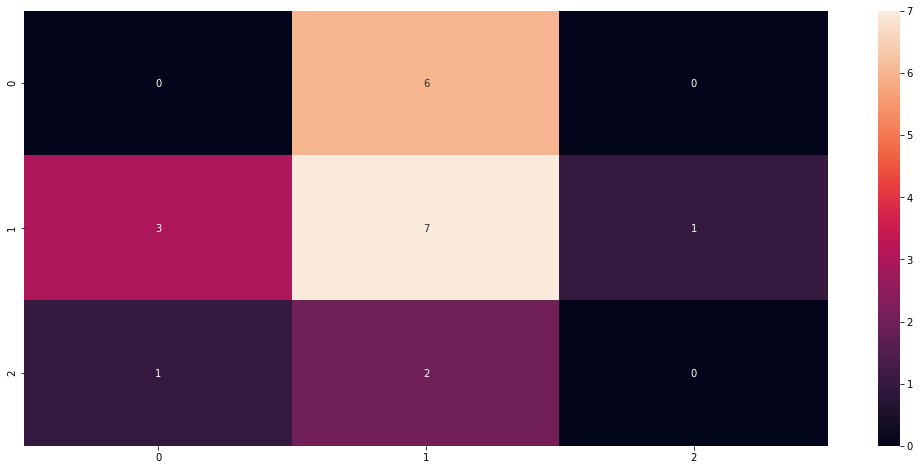

In [41]:
print(logit_scores.best_estimator_)
y_pred_logit = logit_scores.predict(testing_padded)
cm_logit = confusion_matrix(testing_labels_final, y_pred_logit)
plt.figure(figsize=(18,8))
sns.heatmap(cm_logit, annot=True)

In [42]:
print('Precision on test set: {}'.format(precision_score(testing_labels_final, y_pred_logit, average='weighted')))
print('Recall on test set: {}'.format(recall_score(testing_labels_final, y_pred_logit, average='weighted')))
print('F1-score on test set {}'.format(f1_score(testing_labels_final, y_pred_logit, average='weighted')))
print('Accuracy test set {}'.format(accuracy_score(testing_labels_final, y_pred_logit)))

Precision on test set: 0.2566666666666667
Recall on test set: 0.35
F1-score on test set 0.2961538461538462
Accuracy test set 0.35


In [43]:
print(svm_scores.best_estimator_)
y_pred_svm = svm_scores.best_estimator_.predict(testing_padded)

SVC(C=4.175318936560401, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)


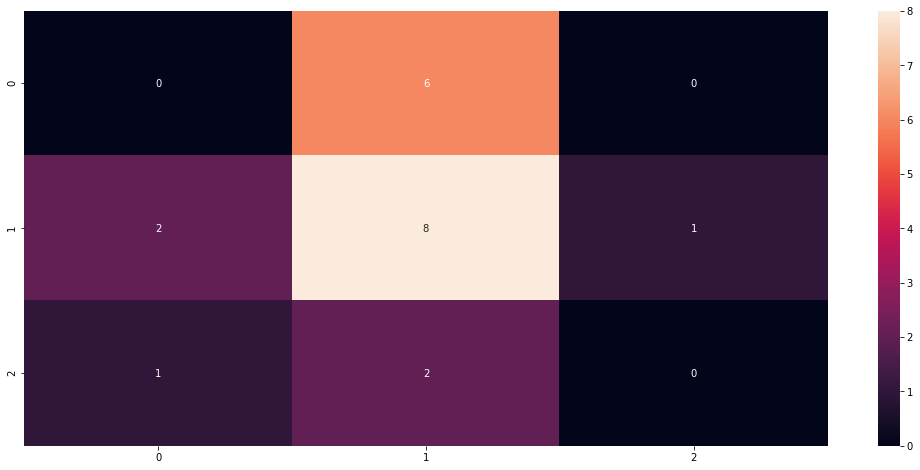

In [44]:
cm_svm = confusion_matrix(testing_labels_final, y_pred_svm)
plt.figure(figsize=(18,8))
sns.heatmap(cm_svm, annot=True)

In [45]:
print('Precision on test set: {}'.format(precision_score(testing_labels_final, y_pred_svm, average='weighted')))
print('Recall on test set: {}'.format(recall_score(testing_labels_final, y_pred_svm, average='weighted')))
print('F1-score on test set {}'.format(f1_score(testing_labels_final, y_pred_svm, average='weighted')))
print('Accuracy test set {}'.format(accuracy_score(testing_labels_final, y_pred_svm)))

Precision on test set: 0.275
Recall on test set: 0.4
F1-score on test set 0.3259259259259259
Accuracy test set 0.4


In [46]:
print(xgb_scores.best_estimator_)
y_pred_xgb = xgb_scores.best_estimator_.predict(testing_padded)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=51, n_jobs=-1,
              nthread=None, num_class=3, objective='multi:softprob',
              random_state=0, rate_drop=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, seed=None, silent=None, subsample=1,
              verbosity=1)


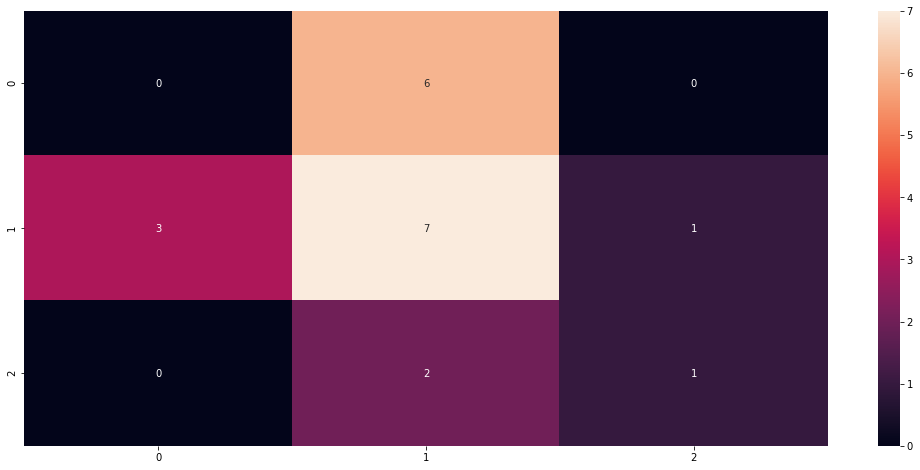

In [47]:
cm_xgb = confusion_matrix(testing_labels_final, y_pred_xgb)
plt.figure(figsize=(18,8))
sns.heatmap(cm_xgb, annot=True)

In [48]:
print('Precision on test set: {}'.format(precision_score(testing_labels_final, y_pred_xgb, average='weighted')))
print('Recall on test set: {}'.format(recall_score(testing_labels_final, y_pred_xgb, average='weighted')))
print('F1-score on test set {}'.format(f1_score(testing_labels_final, y_pred_xgb, average='weighted')))

Precision on test set: 0.33166666666666667
Recall on test set: 0.4
F1-score on test set 0.3561538461538462


In [49]:
df_test = pd.DataFrame(columns=['text'])
for i, e in enumerate(test['url']):
    try:
      response = requests.get(e, verify=False).text
    except:
      pass
    soup1 = BeautifulSoup(response, 'html.parser')
    soup2 = soup1.getText()
    df_test.loc[i] = soup2

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is be

In [50]:
df_test.head()

,text
0,\n\n\n\n\n\n\nBauchspeicheldrüse | Klinik für ...
1,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nChirurgie der Ba...
2,\n\n\n\n\nKreiskliniken Reutlingen - www.kreis...
3,\n\n\n\n\n\n\nLeistungsspektrum: Sankt Marien-...
4,\n\n\n\n\n\n\nLeistungsspektrum: Sankt Marien-...


In [51]:
df_test2 = pd.DataFrame(columns=['text'])
for i,e in enumerate(df_test['text']):
  df_test2.loc[i] = cleaning(e)

In [52]:
df_test2.head()

,text
0,Bauchspeicheldr se Klinik f r Allgemein Visze...
1,Chirurgie der Bauchspeicheldr se Pankreaschir...
2,Kreiskliniken Reutlingen www kreiskliniken re...
3,Leistungsspektrum Sankt Marien Hospital Buer ...
4,Leistungsspektrum Sankt Marien Hospital Buer ...


In [53]:
tok = []
for e in df_test2['text']:
  tok.append(nltk.tokenize.word_tokenize(e))
df_test2['tokens'] = tok

In [54]:
df_test2['tokens']

0     [Bauchspeicheldr, se, Klinik, f, r, Allgemein,...
1     [Chirurgie, der, Bauchspeicheldr, se, Pankreas...
2     [Kreiskliniken, Reutlingen, www, kreiskliniken...
3     [Leistungsspektrum, Sankt, Marien, Hospital, B...
4     [Leistungsspektrum, Sankt, Marien, Hospital, B...
5     [Tumorzentrum, Rostock, e, V, Onkologisches, Z...
6     [Gyn, kologische, Tumore, Asklepios, Harzklini...
7     [Interdisziplin, re, Tumorkonferenzen, Asklepi...
8     [Selbsthilfegruppen, Krankenhaus, Barmherzige,...
9     [Stereotaktische, Radiotherapie, Krankenhaus, ...
10                                                   []
11    [Chirurgie, Nachrichten, Universit, tsklinikum...
12    [Startseite, Carl, Thiem, Klinikum, Cottbus, g...
13    [Onkologisches, Zentrum, Carl, Thiem, Klinikum...
14    [Kontakt, Anfahrt, Darmkrebszentrum, Die, Beha...
15    [DRK, Kliniken, Berlin, Leistungen, c, h, disp...
16    [Zielsetzung, Evangelisches, Klinikum, Niederr...
17    [Ablauf, einer, Strahlentherapie, Zentrum,

In [55]:
filtered_list = []
for e in range(len(df_test2)):
  filtered_sentence = [w for w in df_test2['tokens'].loc[e] if not w in stop_words or stop_words_eng]
  filtered_sentence = [w for w in df_test2['tokens'].loc[e] if not w.lower() in manuals]
  print(filtered_sentence)
  filtered_list.append(filtered_sentence)
df_test2['filtered'] = filtered_list

['Bauchspeicheldr', 'se', 'Klinik', 'f', 'r', 'Allgemein', 'Viszeral', 'und', 'Kinderchirurgie', 'G', 'ttingen', 'Klinik', 'f', 'r', 'Allgemein', 'Viszeral', 'und', 'Kinderchirurgie', 'zur', 'Hauptnavigation', 'springen', 'zum', 'Inhalt', 'wechseln', 'Aktuelles', 'und', 'KontaktKontakt', 'Logo', 'der', 'Universt', 'tsmedizin', 'G', 'ttingen', 'Navigation', 'ffnen', 'oder', 'schliessen', 'HauptnavigationSubnavigation', 'ffnen', 'oder', 'schliessenMedizinische', 'VersorgungPoliklinikSonographieSchilddr', 'seSpeiser', 'hre', 'und', 'MagenDarmBauchspeicheldr', 'seCEDLeber', 'und', 'GalleHernienKoloproktologieAdipositaschirurgieKinderchirurgieSarkomchirurgieHIPECRoboterchirurgieInterdisziplin', 're', 'ZentrenSubnavigation', 'ffnen', 'oder', 'schliessenForschungKlinische', 'StudienTumorepigenetikAG', 'ConradiAG', 'GaedckeAG', 'GradeAG', 'KrauseAG', 'SperlingAG', 'SprengerAG', 'WegwitzPromotionPublikationenSubnavigation', 'ffnen', 'oder', 'schliessenLehreModuleBlockpraktikumFamulaturen', 'PJZ

In [56]:
stem_list = []

for e in range(len(df_test2)):
  stem = []
  for i in df_test2['filtered'].loc[e]:
    stem.append(stemmer.stem(i))
  stem_list.append(stem)

df_test2['stem'] = stem_list

In [57]:
df_test2['stem']

0     [bauchspeicheldr, se, klinik, f, r, allgemein,...
1     [chirurgi, der, bauchspeicheldr, se, pankreasc...
2     [kreiskliniken, reutlingen, kreiskliniken, reu...
3     [leistungsspektrum, sankt, marien, hospit, bue...
4     [leistungsspektrum, sankt, marien, hospit, bue...
5     [tumorzentrum, rostock, e, V, onkologisch, zen...
6     [gyn, kologisch, tumor, asklepio, harzklinik, ...
7     [interdisziplin, re, tumorkonferenzen, asklepi...
8     [selbsthilfegruppen, krankenhau, barmherzig, B...
9     [stereotaktisch, radiotherapi, krankenhau, bar...
10                                                   []
11    [chirurgi, nachrichten, universit, tsklinikum,...
12    [startseit, carl, thiem, klinikum, cottbu, ggm...
13    [onkologisch, zentrum, carl, thiem, klinikum, ...
14    [anfahrt, darmkrebszentrum, die, behandlungsze...
15    [drk, kliniken, berlin, leistungen, c, h, disp...
16    [zielsetzung, evangelisch, klinikum, niederrhe...
17    [ablauf, einer, strahlentherapi, zentrum, 

In [58]:
sentences_test = []
for i in range(len(df_test2)):
  one_obs = ' '.join([e for e in df_test2['stem'].loc[i]])
  sentences_test.append(one_obs)

In [59]:
sentences_test

['bauchspeicheldr se klinik f r allgemein viszer und kinderchirurgi G ttingen klinik f r allgemein viszer und kinderchirurgi zur hauptnavig springen zum inhalt wechseln aktuel und kontaktkontakt logo der universt tsmedizin G ttingen navig ffnen oder schliessen hauptnavigationsubnavig ffnen oder schliessenmedizinisch versorgungpolikliniksonographieschilddr sespeis hre und magendarmbauchspeicheldr secedleb und gallehernienkoloproktologieadipositaschirurgiekinderchirurgiesarkomchirurgiehipecroboterchirurgieinterdisziplin re zentrensubnavig ffnen oder schliessenforschungklinisch studientumorepigenetikag conradiag gaedckeag gradeag krauseag sperlingag sprengerag wegwitzpromotionpublikationensubnavig ffnen oder schliessenlehremoduleblockpraktikumfamulaturen pjzertifikat studentisch OP assist subnavig ffnen oder schliessen ber unsmitarbeiterstationenst re aufnahmegeschicht der klinikaktuel navigationspfadmedizinisch versorgungbauchspeicheldr se pankreaschirurgiedi oper therapi der bauchspeich

In [60]:
test_set_sequences = tokenizer.texts_to_sequences(training_sentences)
test_set_padded = pad_sequences(test_set_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [61]:
test_set_padded = sc.fit_transform(test_set_padded)

In [62]:
final_pred = logit_scores.best_estimator_.predict(test_set_padded)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


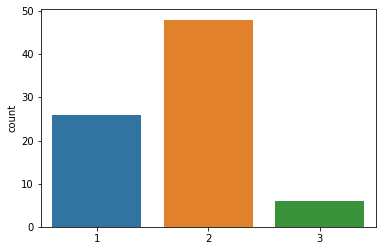

In [63]:
sns.countplot(final_pred)